In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import calendar

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [7]:
frames = [pd.read_csv('../data/transactions_1.csv', index_col=0), pd.read_csv('../data/transactions_2.csv', index_col=0)]
# frames = [pd.read_csv('../data/transactions_1.csv', index_col=0)]
df = pd.concat(frames)
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date')

,customer_id,product_id,date
657826,8752181,G5HEPH9A2T,2017-01-01 08:32:26.307000+00:00
658033,8752181,RZ1BJ9ZV9C,2017-01-01 08:38:15.207000+00:00
755034,7269786,G5HEPH9A2T,2017-01-01 11:29:18.527000+00:00
755319,7269786,FA7OOL7Z3T,2017-01-01 11:59:30.613000+00:00
659733,5255027,FA7OOL7Z3T,2017-01-01 15:22:46.793000+00:00
...,...,...,...
294947,1971440,GJROWT9RPV,2020-03-16 23:29:31.810000+00:00
104192,8350659,G5HEPH9A2T,2020-03-16 23:54:22.647000+00:00
104658,8350659,XZ6UVEYK40,2020-03-16 23:58:40.210000+00:00
103766,8350659,GJROWT9RPV,2020-03-17 00:07:18.663000+00:00


# Questions

## 1. Create an ordered (descending) plot that shows the total number of transactions per customer from the most active customer to the least active one.

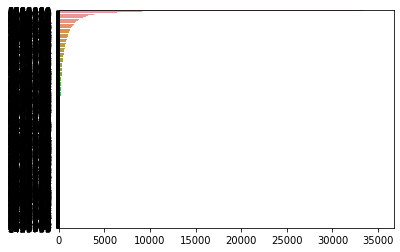

In [8]:
df.groupby('customer_id').count().sort_values('product_id')
foo = df.customer_id.value_counts().reset_index()
foo.columns = ['customer_id', 'counts']

x = [str(val) for val in foo['customer_id'].values]
y = foo['counts'].values

sns.barplot(y, x)
plt.show()

## 2. Given any product ID, create a plot to show its transaction frequency per month for the year 2018.

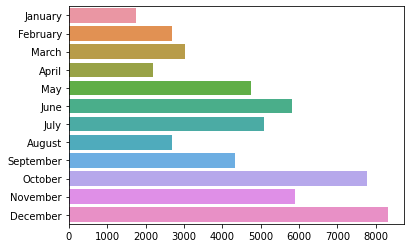

In [9]:
def sale_frequency_by_mouth(product_id: str):
    assert product_id in df['product_id'].values, 'product_id does not exist.'
    selected_product_df = df[df['product_id']==product_id]

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    month_frequency = []
    for month_number in range(1, 13):
        month_name = calendar.month_name[month_number]
        last_day_of_month = calendar.monthrange(2018, month_number)[1]
        count = len(selected_product_df[(selected_product_df['date'].dt.date>datetime.date(2018, month_number, 1)) & (selected_product_df['date'].dt.date<datetime.date(2018, month_number, last_day_of_month))])
        month_frequency.append(count)

    sns.barplot(month_frequency, month_names)
    plt.show()


sale_frequency_by_mouth('5RPSDK28JR')